<a href="https://colab.research.google.com/github/agrawalsajal02/Machine_learning_projects/blob/master/dogcat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from random import shuffle
from tqdm import tqdm

In [0]:
datadir="/content/drive/My Drive/Colab Notebooks/cat_dog_dataset/PetImages"
categories=["Dog","Cat"]
image=[]
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    #image.push(img_array)
    #plt.imshow(img_array,cmap="gray")
    #plt.show()
    #break
  #break


[[199 150 153 ... 170 166 164]
 [146  90  87 ... 115 111 107]
 [152  88  79 ... 108 103 100]
 ...
 [190 152 146 ... 117 114 118]
 [187 159 142 ... 113 114 121]
 [188 164 150 ... 120 121 128]]


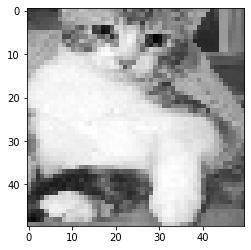

In [20]:
print(img_array)
img_size=50
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [0]:
training_data=[]
def create_training_data():
  for category in categories:
    path=os.path.join(datadir,category)
    class_num=categories.index(category)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
      
create_training_data()




In [0]:
import random
random.shuffle(training_data)

SyntaxError: ignored

In [0]:
x=[]
y=[]

In [0]:
for features,label in training_data:
  x.append(features)
  y.append(label)

x=np.array(x).reshape(-1,img_size,img_size,1)


In [0]:
import pickle
pickle_out=open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()
pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [0]:
x=[]
y=[]
import pickle
pickle_in=open("/content/drive/My Drive/Colab Notebooks/cat_dog_dataset/x.pickle","rb")
x=pickle.load(pickle_in)
pickle_in=open("/content/drive/My Drive/Colab Notebooks/cat_dog_dataset/y.pickle","rb")
y=pickle.load(pickle_in)


In [0]:
 import tensorflow as tf
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

In [0]:
from tensorflow.keras.callbacks import TensorBoard
import time
name="Cats-vs-dogs-cnn-64*2-{}".format(int(time.time()))
tensorboard=TensorBoard(log_dir='/content/drive/My Drive/Colab Notebooks/cat_dog_dataset/logs/{}'.format(name))

In [56]:
import numpy as np  
x = np.array(x) 
x = x/255.0
y=np.array(y)
print(x.shape)
print(y[0])


(162, 50, 50, 1)
0


In [57]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# model.add(Conv2D(256, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 256)       2560      
_________________________________________________________________
activation_15 (Activation)   (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 256)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                9437248   
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
_________________________________________________________________
activation_16 (Activation)   (None, 1)                

In [58]:
model.fit(x, y, batch_size=32, epochs=10, validation_split=0.3,callbacks=[tensorboard])

Train on 113 samples, validate on 49 samples
Epoch 1/10
113/113 [==============================] - 0s 3ms/sample - loss: 4.1907 - acc: 0.5221 - val_loss: 8.1516 - val_acc: 0.3265
Epoch 2/10
113/113 [==============================] - 0s 423us/sample - loss: 3.2212 - acc: 0.5221 - val_loss: 2.2802 - val_acc: 0.6735
Epoch 3/10
113/113 [==============================] - 0s 395us/sample - loss: 2.0895 - acc: 0.5841 - val_loss: 1.0433 - val_acc: 0.6735
Epoch 4/10
113/113 [==============================] - 0s 415us/sample - loss: 0.7013 - acc: 0.5841 - val_loss: 0.9109 - val_acc: 0.3265
Epoch 5/10
113/113 [==============================] - 0s 512us/sample - loss: 0.4961 - acc: 0.7522 - val_loss: 0.6677 - val_acc: 0.6735
Epoch 6/10
113/113 [==============================] - 0s 412us/sample - loss: 0.4265 - acc: 0.7611 - val_loss: 0.6386 - val_acc: 0.6939
Epoch 7/10
113/113 [==============================] - 0s 412us/sample - loss: 0.3489 - acc: 0.9381 - val_loss: 0.6536 - val_acc: 0.6939
Epoch

In [0]:
# to view tensorboard 
#type interminal , afterlocating the log directry that you have downloaded from collab location
#tensorboard --logdir="C:/Users/DELL/Downloads/logs-20200309T100123Z-001/logs


In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/cat_dog_dataset/64bitconvnet.model")

In [0]:
import cv2
import tensorflow as tf
categories=["Dog","Cat"]
def prepare(filepath):
  img_size=50
  img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
  new_array=cv2.resize(img_array,(img_size,img_size))
  return new_array.reshape(-1,img_size,img_size,1)

In [70]:
model=tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/cat_dog_dataset/64bitconvnet.model")
#remember alwawys predict a list,even for 1 item
prediction=model.predict([prepare("/content/drive/My Drive/Colab Notebooks/cat_dog_dataset/PetImages/Dog/0.jpg")])
print(prediction)
print(categories[int(prediction[0][0])])

[[0.]]
Dog
